15:31:55 - cmdstanpy - INFO - Chain [1] start processing
15:31:56 - cmdstanpy - INFO - Chain [1] done processing


             ds        trend  yhat_lower   yhat_upper  trend_lower  \
0    2014-07-07    61.905293  -25.029072   150.512229    61.905293   
1    2014-07-08    60.673707  -22.815905   153.536646    60.673707   
2    2014-07-09    59.442121  -23.631281   155.633857    59.442121   
3    2014-07-10    58.210535  -20.296256   149.364030    58.210535   
4    2014-07-11    56.978948  -20.347413   155.402119    56.978948   
...         ...          ...         ...          ...          ...   
2137 2022-12-26  1005.500628  803.491146  1584.847480   637.883050   
2138 2022-12-27  1006.174802  822.806553  1599.230247   635.386629   
2139 2022-12-28  1006.848977  812.363563  1616.054284   632.890209   
2140 2022-12-29  1007.523151  813.583623  1648.146726   630.393789   
2141 2022-12-30  1008.197326  807.942462  1632.120982   626.566544   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0       61.905293        2.981489              2.981489              2.981489 

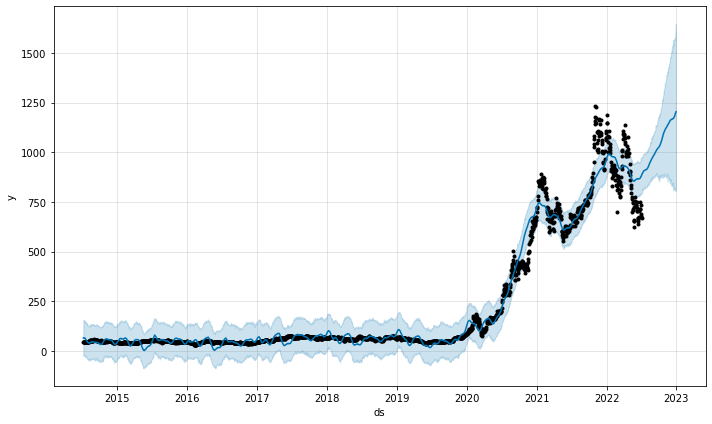

In [12]:
from prophet import Prophet
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

data = pd.read_csv('tsla-data1.csv')


m = Prophet(changepoint_prior_scale=0.5, holidays_prior_scale=0.01, seasonality_prior_scale=10.0, interval_width=0.9, daily_seasonality=True).fit(data)
future = m.make_future_dataframe(periods=180)

# Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

forecast = m.predict(future)
print(forecast)
fig = m.plot(forecast)




In [9]:
#df = forecast["yhat", "ds"]
df = (forecast.loc[:, ["yhat", "ds"]]).iloc[-1:]
print(df)

            yhat         ds
2193  1195.95101 2023-01-01


In [11]:
yhat_future = df["yhat"]
print(yhat_future)

2193    1195.95101
Name: yhat, dtype: float64


In [25]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='180 days', period='45 days', horizon = '90 days')
df_cv.tail()


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/59 [00:00<?, ?it/s]

15:55:33 - cmdstanpy - INFO - Chain [1] start processing
15:55:33 - cmdstanpy - INFO - Chain [1] done processing
15:55:34 - cmdstanpy - INFO - Chain [1] start processing
15:55:34 - cmdstanpy - INFO - Chain [1] done processing
15:55:35 - cmdstanpy - INFO - Chain [1] start processing
15:55:35 - cmdstanpy - INFO - Chain [1] done processing
15:55:36 - cmdstanpy - INFO - Chain [1] start processing
15:55:36 - cmdstanpy - INFO - Chain [1] done processing
15:55:37 - cmdstanpy - INFO - Chain [1] start processing
15:55:37 - cmdstanpy - INFO - Chain [1] done processing
15:55:38 - cmdstanpy - INFO - Chain [1] start processing
15:55:38 - cmdstanpy - INFO - Chain [1] done processing
15:55:39 - cmdstanpy - INFO - Chain [1] start processing
15:55:44 - cmdstanpy - INFO - Chain [1] done processing
15:55:45 - cmdstanpy - INFO - Chain [1] start processing
15:55:45 - cmdstanpy - INFO - Chain [1] done processing
15:55:46 - cmdstanpy - INFO - Chain [1] start processing
15:55:47 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
3656,2022-06-28,984.145747,870.280817,1090.601327,733.450012,2022-04-06
3657,2022-06-29,985.423126,859.452914,1093.705676,691.500000,2022-04-06
3658,2022-06-30,986.222553,874.698961,1104.346600,673.530029,2022-04-06
3659,2022-07-01,987.255899,868.920340,1105.641394,681.000000,2022-04-06
3660,2022-07-05,995.787515,872.545677,1118.011981,669.000000,2022-04-06


In [24]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,18 days,4695.904769,68.526672,32.791573,0.127701,0.100317,0.135160,0.306020
1,19 days,4817.868109,69.410864,33.815926,0.131102,0.104367,0.139143,0.292310
2,20 days,4842.267400,69.586402,34.383801,0.133950,0.105283,0.142536,0.284589
3,21 days,5033.933235,70.950217,35.433255,0.137596,0.110121,0.147043,0.275150
4,22 days,5360.679836,73.216664,36.329771,0.140713,0.112149,0.150364,0.274661
